In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 3D visualization

In [2]:

# Define the vertices of the cube
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

# Function to rotate the vertices in 3D
def rotate_cube(vertices, angles):
    # Convert angles to radians
    angles_rad = np.radians(angles)
    
    # Define the rotation matrices
    rotation_x = np.array([
        [1, 0, 0],
        [0, np.cos(angles_rad[0]), -np.sin(angles_rad[0])],
        [0, np.sin(angles_rad[0]), np.cos(angles_rad[0])]
    ])
    
    rotation_y = np.array([
        [np.cos(angles_rad[1]), 0, np.sin(angles_rad[1])],
        [0, 1, 0],
        [-np.sin(angles_rad[1]), 0, np.cos(angles_rad[1])]
    ])
    
    rotation_z = np.array([
        [np.cos(angles_rad[2]), -np.sin(angles_rad[2]), 0],
        [np.sin(angles_rad[2]), np.cos(angles_rad[2]), 0],
        [0, 0, 1]
    ])
    
    # Rotate the vertices
    rotated_vertices = np.dot(vertices, rotation_x)
    rotated_vertices = np.dot(rotated_vertices, rotation_y)
    rotated_vertices = np.dot(rotated_vertices, rotation_z)
    
    return rotated_vertices

# Set the rotation angles (in degrees) for each axis (x, y, z)
rotation_angles = [20, 20, 10]
# rotation_angles = [0, 0, 0]

# Rotate the cube vertices
cube = rotate_cube(vertices, rotation_angles)

# Print the rotated vertices coordinates
for vertex in cube:
    print(vertex)

edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

[0. 0. 0.]
[ 0.92541658 -0.16317591  0.34202014]
[1.20379311 0.74192769 0.02062634]
[ 0.27837653  0.9051036  -0.3213938 ]
[-0.25711994  0.39263354  0.88302222]
[0.66829664 0.22945763 1.22504236]
[0.94667318 1.13456123 0.90364856]
[0.0212566  1.29773714 0.56162842]


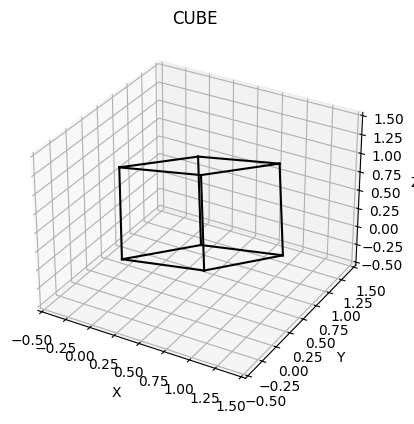

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# distance = lambda x, y: (x - y).dot(x - y)
# for edge in edges:
#     print(distance(rotated_vertices[edge[0]], rotated_vertices[edge[1]]))

# Plot the cube
for edge in edges:
    ax.plot([cube[edge[0]][0], cube[edge[1]][0]],
            [cube[edge[0]][1], cube[edge[1]][1]],
            [cube[edge[0]][2], cube[edge[1]][2]], 'k-')

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# # Set axis limits
ax.set_xlim(-.5, 1.5)
ax.set_ylim(-.5, 1.5)
ax.set_zlim(-.5, 1.5)

# Show the plot
plt.title("CUBE")
plt.show()

In [4]:
import sys
sys.path.append("..")
from geometry_metrics import sample_distortion, sample_unit_gaussian

C:\Users\bjmiao\AppData\Local\Temp\ipykernel_17528\2746734845.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(


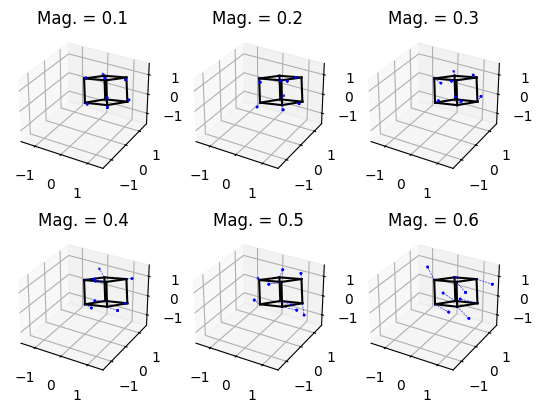

In [5]:
np.random.seed(2697)

fig = plt.figure()

# magnitude = 0.6
for fig_index, magnitude in enumerate([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]):
    ax = fig.add_subplot(2, 3, fig_index+1, projection='3d')
    cube_distort = cube.copy()
    for i in range(cube.shape[0]):
        cube_distort[i, :] += sample_distortion(dimension=3, magnitude=magnitude).flatten()


    # Plot the cube
    for edge in edges:
        ax.plot([cube[edge[0]][0], cube[edge[1]][0]],
                [cube[edge[0]][1], cube[edge[1]][1]],
                [cube[edge[0]][2], cube[edge[1]][2]], 'k-')

    # plot the distorted one
    for edge in edges:
        ax.scatter([cube_distort[edge[0]][0], cube_distort[edge[1]][0]],
                [cube_distort[edge[0]][1], cube_distort[edge[1]][1]],
                [cube_distort[edge[0]][2], cube_distort[edge[1]][2]], 'k-', color='blue', s = 1)

    # Plot the line between the original vertex to the distorted vertex
    for i in range(cube.shape[0]):
        ax.plot(
            [cube[i][0], cube_distort[i][0]],
            [cube[i][1], cube_distort[i][1]],
            [cube[i][2], cube_distort[i][2]], 'k--', color='blue', linewidth=0.4
        )

    # # Set axis labels
    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')

    # # Set axis limits
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_zlim(-1.5, 1.5)

    # Show the plot
    plt.title(f"Mag. = {magnitude}")



plt.show()


C:\Users\bjmiao\AppData\Local\Temp\ipykernel_17528\412938792.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax.plot([cube_distort[edge[0]][0], cube_distort[edge[1]][0]],


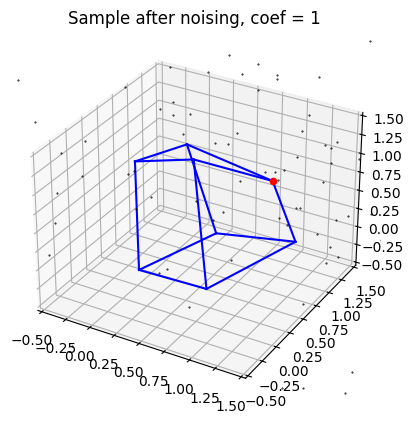

In [6]:
np.random.seed(2697)

fig = plt.figure()

magnitude = 0.2

cube_distort = cube.copy()
for i in range(cube.shape[0]):
    cube_distort[i, :] += sample_distortion(dimension=3, magnitude=magnitude).flatten()

ax = fig.add_subplot(111, projection='3d')

# plot the distorted cube
for edge in edges:
    ax.plot([cube_distort[edge[0]][0], cube_distort[edge[1]][0]],
            [cube_distort[edge[0]][1], cube_distort[edge[1]][1]],
            [cube_distort[edge[0]][2], cube_distort[edge[1]][2]], 'k-', color='blue')

v_id = 6
nsamples = 100
central = cube_distort[v_id]
noise_coef = 1
noised_point = [central + sample_unit_gaussian(dim=3) * noise_coef for _ in range(nsamples)]

ax.scatter(*central, color='red', s = 20)

for p in noised_point:
    ax.scatter(*p, color='black', s = 0.2)


# # Set axis labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Set axis limits
ax.set_xlim(-.5, 1.5)
ax.set_ylim(-.5, 1.5)
ax.set_zlim(-.5, 1.5)

# Show the plot
# plt.title(f"Mag. = {magnitude}")

plt.title(f"Sample after noising, coef = {noise_coef}")

plt.show()


# Calculation in 100-dimensional space

In [7]:
import numpy as np
np.random.seed(10001)
dimension = 100
hi_dim_cube = np.array([
    [0, 0, 0] + [0] * 97,
    [1, 0, 0] + [0] * 97,
    [1, 1, 0] + [0] * 97,
    [0, 1, 0] + [0] * 97,
    [0, 0, 1] + [0] * 97,
    [1, 0, 1] + [0] * 97,
    [1, 1, 1] + [0] * 97,
    [0, 1, 1] + [0] * 97
]).astype("float")

magnitude = 1
noise_coef = 0.2

hi_dim_cube_distort = hi_dim_cube.copy()
hi_dim_cube_distort += sample_distortion(dimension=dimension, magnitude=magnitude, size=8)

hi_dim_cube_noised = hi_dim_cube_distort.copy()
for i in range(hi_dim_cube.shape[0]):
    hi_dim_cube_noised[i] += sample_unit_gaussian(dimension) * noise_coef


(792, 3)
(792, 100)


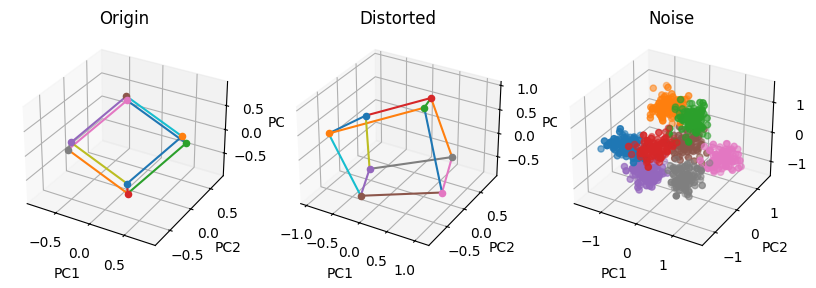

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
a1 = pca.fit_transform(hi_dim_cube)
a2 = pca.fit_transform(hi_dim_cube_distort)

DEFAULT_EDGE = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]

def plot_3d_cube(ax, cube, edges = DEFAULT_EDGE):
    for edge in edges:
        ax.plot(
            [cube[edge[0]][0], cube[edge[1]][0]],
            [cube[edge[0]][1], cube[edge[1]][1]],
            [cube[edge[0]][2], cube[edge[1]][2]],
        )
    for i in range(cube.shape[0]):
        ax.scatter(*cube[i])
        

fig = plt.figure(figsize = (10, 3))

for fig_index, (cube, title) in enumerate(zip([a1, a2], ['Origin', 'Distorted'])):
    ax = fig.add_subplot(1, 3, fig_index + 1, projection='3d')
    plot_3d_cube(ax, cube)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.set_title(title)

nsamples = 99
point_clouds = []
for i in range(hi_dim_cube_distort.shape[0]):
    central = hi_dim_cube_distort[i]
    point_clouds += [sample_unit_gaussian(100) * noise_coef + central for _ in range(nsamples)]
point_clouds = np.array(point_clouds)

a3 = pca.fit_transform(point_clouds)
print(a3.shape)
ax = fig.add_subplot(1, 3, 3, projection = '3d')

for i in range(hi_dim_cube_distort.shape[0]):
    ax.scatter(a3[i * nsamples: (i+1) * nsamples, 0],
                a3[i * nsamples: (i+1) * nsamples, 1],
                a3[i * nsamples: (i+1) * nsamples, 2],)
ax.set_title("Noise")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
print(point_clouds.shape)
# print(a1.shape, a2.shape, a3.shape)

# Calculate metrics

In [9]:
from sklearn.linear_model import RidgeClassifier
from geometry_metrics import shattering_dimensionality, CCGP, span_to_gaussian_cloud, generate_hypercube_in_embedding_space, generate_grid_in_embedding_space

In [23]:
cube_dimension = 3
embed_dimension = 3
noise_coef = 1
distort_magnitude = 0.25

hi_dim_cube = generate_hypercube_in_embedding_space(cube_dimension, embed_dimension, choice = [-1, 1])
qlen = hi_dim_cube.shape[0]
hi_dim_cube_distort = hi_dim_cube + sample_distortion(embed_dimension, distort_magnitude, size = qlen)

# sd = shattering_dimensionality(hi_dim_cube_distort, noise_coef = noise_coef, sample_dichotomy=1000, verbose = True)
# sd
# ccgp = CCGP(hi_dim_cube_distort, noise_coef=noise_coef, first_K=cube_dimension, verbose = True)
# ccgp

In [24]:
for nsamples in [100, 300, 500, 1000]:
    sd = shattering_dimensionality(hi_dim_cube_distort, noise_coef = noise_coef, nsamples=nsamples)
    print(nsamples, sd)


#sampling dichotomy: 35 35
100 0.6929285714285714
#sampling dichotomy: 35 35
300 0.6901071428571428
#sampling dichotomy: 35 35
500 0.6926285714285715
#sampling dichotomy: 35 35
1000 0.6924750000000001


In [25]:
# def get_linear_boundary(pcloud1, pcloud2):
noise_coef = 1
hi_dim_cube = generate_hypercube_in_embedding_space(cube_dimension, embed_dimension, choice = [-1, 1])
print(hi_dim_cube[:,:3])
pcloud1 = hi_dim_cube[0::2, :]
pcloud2 = hi_dim_cube[1::2, :]
print(pcloud1.shape, pcloud2.shape)



[[-1. -1. -1.]
 [ 1. -1. -1.]
 [-1.  1. -1.]
 [ 1.  1. -1.]
 [-1. -1.  1.]
 [ 1. -1.  1.]
 [-1.  1.  1.]
 [ 1.  1.  1.]]
(4, 3) (4, 3)


In [12]:
from scipy.stats import norm

In [13]:
def get_boundary(pcloud1, pcloud2):
    X = np.concatenate([pcloud1, pcloud2], axis = 0)
    y = np.array([0]*len(pcloud1) + [1]*len(pcloud2))
    svc = RidgeClassifier(alpha=0)
    clf = svc.fit(X, y)
    return clf.coef_, clf.intercept_

In [14]:
def get_distance_point_to_plane(coef, intercept, point):
    '''
        we assume this plain go through the origin point
    '''
    dist = np.dot(coef, point) + intercept
    assert dist.size == 1
    return dist.item()


In [26]:
sd = shattering_dimensionality(
    hi_dim_cube, nsamples=1000, noise_coef=noise_coef, verbose=True
)
sd

#sampling dichotomy: 35 35


array([0.8465  , 0.7845  , 0.714375, 0.71275 , 0.666625, 0.704625,
       0.777625, 0.672875, 0.70675 , 0.848375, 0.716   , 0.678625,
       0.677875, 0.7115  , 0.50025 , 0.711   , 0.666   , 0.76775 ,
       0.70975 , 0.71075 , 0.8365  , 0.672625, 0.67125 , 0.499   ,
       0.7195  , 0.66575 , 0.675125, 0.50725 , 0.504   , 0.67075 ,
       0.676375, 0.771125, 0.715375, 0.712   , 0.663625])

In [27]:
from itertools import combinations
points = hi_dim_cube
num_points = hi_dim_cube.shape[0]
all_label = list(range(num_points))
label_sets_1 = [x for x in combinations(all_label, num_points // 2) if 0 in x] # to avoid repetetion
label_sets_2 = [tuple([x for x in range(num_points) if not x in label_set1]) for label_set1 in label_sets_1]

# label_sets_1 = [(0, 1, 2, 5)]
# label_sets_2 = [(3, 4, 6, 7)]

sd_expect_all = []
for l1, l2 in zip(label_sets_1, label_sets_2):
    ps1 = points[l1, :]
    ps2 = points[l2, :]

    coef, intercept = get_boundary(ps1, ps2)
    print(coef, intercept)
    dists = [get_distance_point_to_plane(coef, intercept, -p) for p in ps1] \
           + [get_distance_point_to_plane(coef, intercept, p) for p in ps2]
#     print(dists)
    if noise_coef == 0:
        def sign_func(dist):
            if dist > 0:
                return 1
            elif dist < 0:
                return 0
            elif dist == 0:
                return 0.5
        sd_expect = np.mean([
            sign_func(dist) for dist in dists
        ])
    else: # noise_coef > 0
        sd_expect = np.mean([
            norm.cdf(dist / noise_coef) for dist in dists
        ])
    sd_expect_all.append(sd_expect)
print(sd_expect_all)

[[0. 0. 1.]] [0.]
[[0.5 0.5 0.5]] [0.]
[[0.  0.5 0.5]] [0.]
[[0.5 0.  0.5]] [0.]
[[0.  0.  0.5]] [0.]
[[0.  0.5 0.5]] [0.]
[[-0.5  0.5  0.5]] [0.]
[[0.  0.  0.5]] [0.]
[[-0.5  0.   0.5]] [0.]
[[0. 1. 0.]] [0.]
[[0.5 0.5 0. ]] [0.]
[[0.  0.5 0. ]] [0.]
[[0.  0.5 0. ]] [0.]
[[-0.5  0.5  0. ]] [0.]
[[0. 0. 0.]] [0.]
[[0.5 0.  0.5]] [0.]
[[0.  0.  0.5]] [0.]
[[ 0.5 -0.5  0.5]] [0.]
[[ 0.  -0.5  0.5]] [0.]
[[0.5 0.5 0. ]] [0.]
[[1. 0. 0.]] [0.]
[[0.5 0.  0. ]] [0.]
[[0.5 0.  0. ]] [0.]
[[0. 0. 0.]] [0.]
[[ 0.5 -0.5  0. ]] [0.]
[[0.  0.5 0. ]] [0.]
[[0.5 0.  0. ]] [0.]
[[0. 0. 0.]] [0.]
[[0. 0. 0.]] [0.]
[[-0.5  0.   0. ]] [0.]
[[ 0.  -0.5  0. ]] [0.]
[[ 0.5  0.5 -0.5]] [0.]
[[ 0.   0.5 -0.5]] [0.]
[[ 0.5  0.  -0.5]] [0.]
[[ 0.   0.  -0.5]] [0.]
[0.8413447460685429, 0.7518950456382952, 0.6706723730342714, 0.6706723730342714, 0.5957312306370065, 0.6706723730342714, 0.7518950456382952, 0.5957312306370065, 0.6706723730342714, 0.8413447460685429, 0.6706723730342714, 0.5957312306370065, 0.5957312

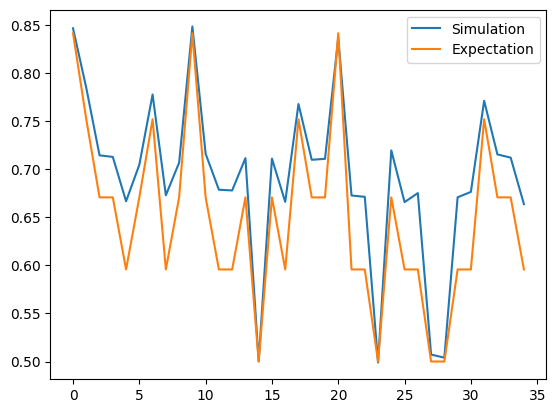

In [28]:
plt.plot(sd, label = "Simulation")
plt.plot(sd_expect_all, label = "Expectation")
plt.legend()

[[0.  0.5 0.5]] [0.]
[[-0.0016299   0.47949     0.48302818]] [-0.00035783]


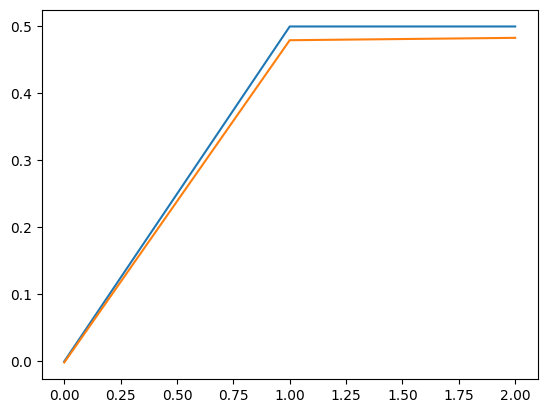

In [47]:
from itertools import combinations
points = hi_dim_cube
num_points = hi_dim_cube.shape[0]
all_label = list(range(num_points))
# label_sets_1 = [x for x in combinations(all_label, num_points // 2) if 0 in x] # to avoid repetetion
# label_sets_2 = [tuple([x for x in range(num_points) if not x in label_set1]) for label_set1 in label_sets_1]

label_sets_1 = [(0, 1, 2, 5)]
label_sets_2 = [(3, 4, 6, 7)]

nsamples = 1000
noise_coef = 0.2

sd_expect_all = []
for l1, l2 in zip(label_sets_1, label_sets_2):
    ps1 = points[l1, :]
    ps2 = points[l2, :]
    coef, intercept = get_boundary(ps1, ps2)
    print(coef, intercept)
    
    pcloud1 = span_to_gaussian_cloud(ps1, nsamples=nsamples, noise_coef=noise_coef)
    pcloud2 = span_to_gaussian_cloud(ps2, nsamples=nsamples, noise_coef=noise_coef)
    coef_span, intercept_span = get_boundary(pcloud1, pcloud2)
    print(coef_span, intercept_span)
    plt.plot(coef[0])
    plt.plot(coef_span[0])
# print(sd_expect_all)

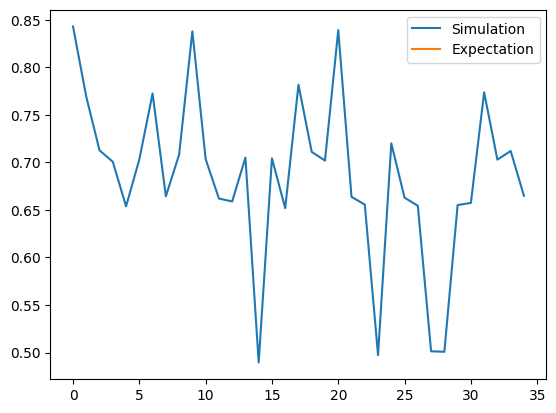

(array([ 19.,  90., 190., 171., 153., 179., 101.,  34.,  44.,  19.]),
 array([0.58875  , 0.6108125, 0.632875 , 0.6549375, 0.677    , 0.6990625,
        0.721125 , 0.7431875, 0.76525  , 0.7873125, 0.809375 ]),
 <BarContainer object of 10 artists>)

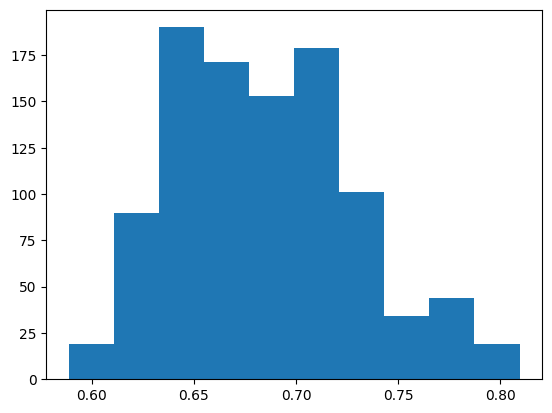

In [17]:
plt.hist(sd)
# plt.hist(ccgp)

In [45]:
records = []

# for cube_dimension in [2, 3, 4, 5]:
# for cube_dimension in [3, 4, 5]:
for cube_dimension in [3]:
    for embed_dimension in range(100, 101, 20):
        hi_dim_cube = generate_hypercube_in_embedding_space(cube_dimension, embed_dimension, choice = [-1, 1])
        # hi_dim_cube = generate_hypercube_in_embedding_space(cube_dimension, embed_dimension)
        qlen = hi_dim_cube.shape[0] # 2 ** cube_dimension
        for noise_coef in [0.2, 1]:
            for distort_magnitude in np.arange(0, 4, 0.25):
                if distort_magnitude == 0:
                    hi_dim_cube_distort = hi_dim_cube
                else:
                    hi_dim_cube_distort = hi_dim_cube + sample_distortion(embed_dimension, distort_magnitude, size = qlen)
                sd = shattering_dimensionality(hi_dim_cube_distort, noise_coef = noise_coef)
                # sd = 0
                ccgp = CCGP(hi_dim_cube_distort, noise_coef=noise_coef, first_K=cube_dimension)
                print(cube_dimension, embed_dimension, noise_coef, distort_magnitude, sd, ccgp)
                records.append({
                    "cube_dimension":cube_dimension,
                    "embed_dimension":embed_dimension,
                    "noise_coef": noise_coef,
                    "distort_magnitude": distort_magnitude,
                    "sd": sd,
                    "ccgp": ccgp,
                })

df_results = pd.DataFrame.from_records(records)
df_results.head()

3 100 0.2 0.0 0.8216785714285714 0.9466203703703703
3 100 0.2 0.25 0.8657142857142858 0.9423842592592592
3 100 0.2 0.5 0.92525 0.9420601851851852
3 100 0.2 0.75 0.9679642857142858 0.9457407407407409
3 100 0.2 1.0 0.9897857142857143 0.9389120370370371
3 100 0.2 1.25 0.9960357142857145 0.9257175925925928
3 100 0.2 1.5 0.9986428571428572 0.887037037037037
3 100 0.2 1.75 0.9999642857142857 0.8365046296296296
3 100 0.2 2.0 1.0 0.8701388888888889
3 100 0.2 2.25 1.0 0.7712499999999999
3 100 0.2 2.5 1.0 0.7943055555555555
3 100 0.2 2.75 1.0 0.7861574074074075
3 100 0.2 3.0 1.0 0.7983564814814814
3 100 0.2 3.25 1.0 0.6937268518518517
3 100 0.2 3.5 1.0 0.6734259259259261
3 100 0.2 3.75 1.0 0.748263888888889
3 100 1 0.0 0.7500357142857143 0.6923148148148148
3 100 1 0.25 0.7522142857142856 0.6952546296296296
3 100 1 0.5 0.7518214285714286 0.6928935185185185
3 100 1 0.75 0.7676428571428572 0.6817592592592593
3 100 1 1.0 0.7836428571428571 0.6675694444444445
3 100 1 1.25 0.7976785714285715 0.6641435

,cube_dimension,embed_dimension,noise_coef,distort_magnitude,sd,ccgp
0,3,100,0.2,0.00,0.821679,0.946620
1,3,100,0.2,0.25,0.865714,0.942384
2,3,100,0.2,0.50,0.925250,0.942060
3,3,100,0.2,0.75,0.967964,0.945741
4,3,100,0.2,1.00,0.989786,0.938912


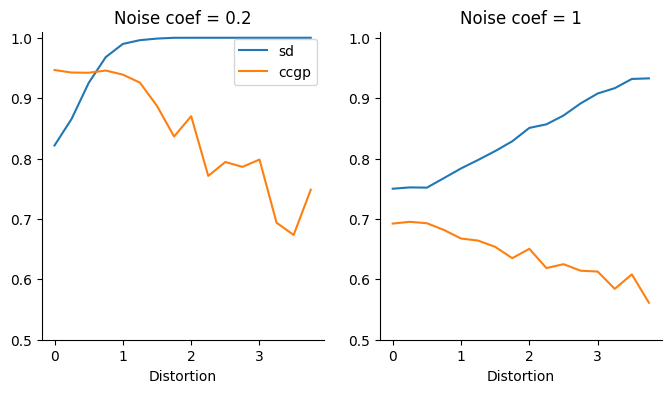

In [49]:
df_original_result = df_results[(df_results.cube_dimension == 3) & (df_results.embed_dimension == 100)]

fig, axs = plt.subplots(1, 2, figsize = (8, 4))
for ax, noise_coef in zip(axs, [0.2, 1]):
    df1 = df_original_result[df_original_result.noise_coef == noise_coef]
    ax.plot(df1.distort_magnitude, df1.sd, label = 'sd')
    ax.plot(df1.distort_magnitude, df1.ccgp, label = 'ccgp')
    ax.set_title(f"Noise coef = {noise_coef}")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(0.5, 1.01)
    ax.set_xlabel("Distortion")
axs[0].legend()